# PREDICTION USING UNSUPERVISED MACHINE LEARNING


In [91]:
#import the required libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

In [92]:
#filter warnings
import warnings
warnings.filterwarnings('ignore')

In [93]:
#setting the working directory
os.chdir(R'C:\Users\TANIA DAS\Downloads')

#loading the csv data into a data frame
mall=pd.read_csv('Mall_Customers.csv')
display(mall)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EXPLORATORY DATA ANALYSIS

In [94]:
#head of the data
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [95]:
mall=mall.rename(columns={'Genre':'Gender'})

In [96]:
#checking the data dimensions
mall.shape

(200, 5)

In [97]:
#viewing the columns of the data
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [98]:
#checking the column information
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [99]:
#checking the structure of the data
mall.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [100]:
mall=mall.drop(['CustomerID'],axis=1)  # Dropping the column 'CustomerID' since it is a column of unique identifier on which no further analysis can  be made

In [101]:
#checking for missing values if any
mall.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values in my data.

In [102]:
mall.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [103]:
#showing correlation between the variables
correlation_matrix=mall.corr()
display(correlation_matrix)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

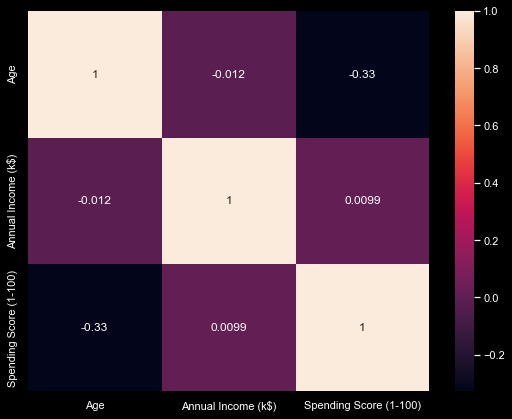

In [104]:
#plotting the correlation matrix using heatmap
plt.style.use('dark_background')
plt.subplots(figsize=(9,7))
sns.heatmap(correlation_matrix,annot=True)

Text(0.5, 0, 'SPENDING SCORE')

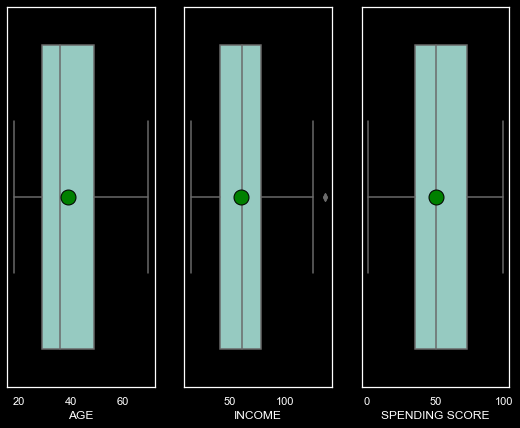

In [105]:
#checking outliers using boxplots
plt.style.use('dark_background')
plt.figure(figsize=(9,7))
plt.subplot(1,3,1)
sns.boxplot(mall['Age'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'green','markeredgecolor':'black','markersize':15})
plt.xlabel('AGE',fontdict={'color':'white','fontsize':12})

plt.subplot(1,3,2)
sns.boxplot(mall['Annual Income (k$)'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'green','markeredgecolor':'black','markersize':15})
plt.xlabel('INCOME',fontdict={'color':'white','fontsize':12})

plt.subplot(1,3,3)
sns.boxplot(mall['Spending Score (1-100)'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'green','markeredgecolor':'black','markersize':15})
plt.xlabel('SPENDING SCORE',fontdict={'color':'white','fontsize':12})


There are no outliers present in the dataset.

In [106]:
print(len(mall))

200


There are 200 customers in the dataset.

In [107]:
spend=mall.groupby(['Gender']).agg({'Spending Score (1-100)':'mean'})
print(spend)

        Spending Score (1-100)
Gender                        
Female               51.526786
Male                 48.511364


Females spend slightly more as compared to males.

# DATA VISUALIZATION

## Univariate Analysis

In [108]:
mall['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0, 0.5, 'COUNT')

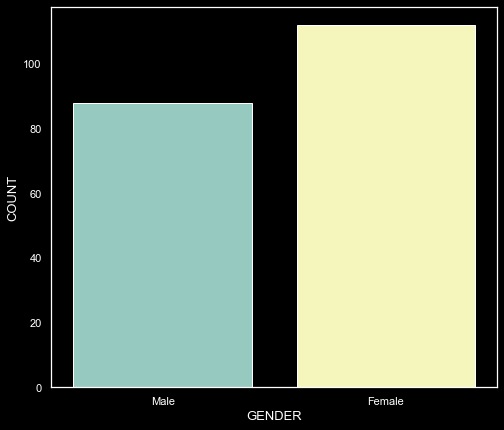

In [109]:
plt.style.use('dark_background')
plt.subplots(figsize=(8,7))
sns.countplot(mall['Gender'])
plt.xlabel('GENDER',fontdict={'color':'white','size':13})
plt.ylabel('COUNT',fontdict={'color':'white','size':13})

Both the barchart and counts show that there are more female customers than male customers.

In [110]:
mean_age=mall['Age'].mean()
print('The mean age is',mean_age)
median_age=mall['Age'].median()
print('The median age is',median_age)

The mean age is 38.85
The median age is 36.0


Text(0, 0.5, 'COUNT')

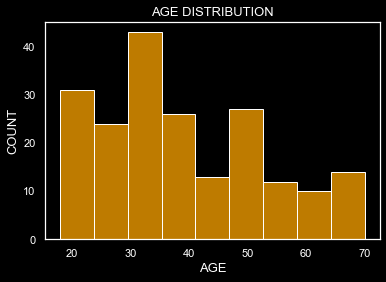

In [111]:
plt.style.use('dark_background')
sns.histplot(mall['Age'],color='orange')
plt.title('AGE DISTRIBUTION',fontdict={'color':'white','size':13})
plt.xlabel('AGE',fontdict={'color':'white','size':13})
plt.ylabel('COUNT',fontdict={'color':'white','size':13})

Most of the customers are in the age-group of 25-40 years with an average age of 38.85 and median age of 36 years.

Text(0, 0.5, 'COUNT')

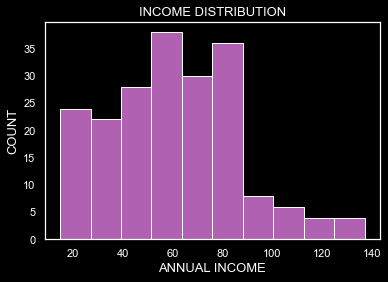

In [112]:
plt.style.use('dark_background')
sns.histplot(mall['Annual Income (k$)'],color='violet')
plt.title('INCOME DISTRIBUTION',fontdict={'color':'white','size':13})
plt.xlabel('ANNUAL INCOME',fontdict={'color':'white','size':13})
plt.ylabel('COUNT',fontdict={'color':'white','size':13})

Most of the customers have an annual income in the range of 20-80.

Text(0, 0.5, 'COUNT')

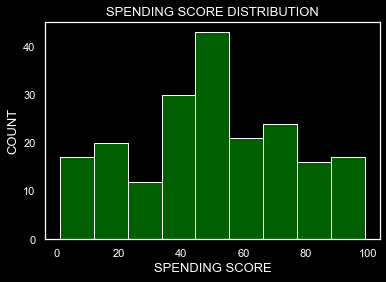

In [113]:
plt.style.use('dark_background')
sns.histplot(mall['Spending Score (1-100)'],color='green')
plt.title('SPENDING SCORE DISTRIBUTION',fontdict={'color':'white','size':13})
plt.xlabel('SPENDING SCORE',fontdict={'color':'white','size':13})
plt.ylabel('COUNT',fontdict={'color':'white','size':13})

Spending score is normally distributed.

## Bivariate Analysis

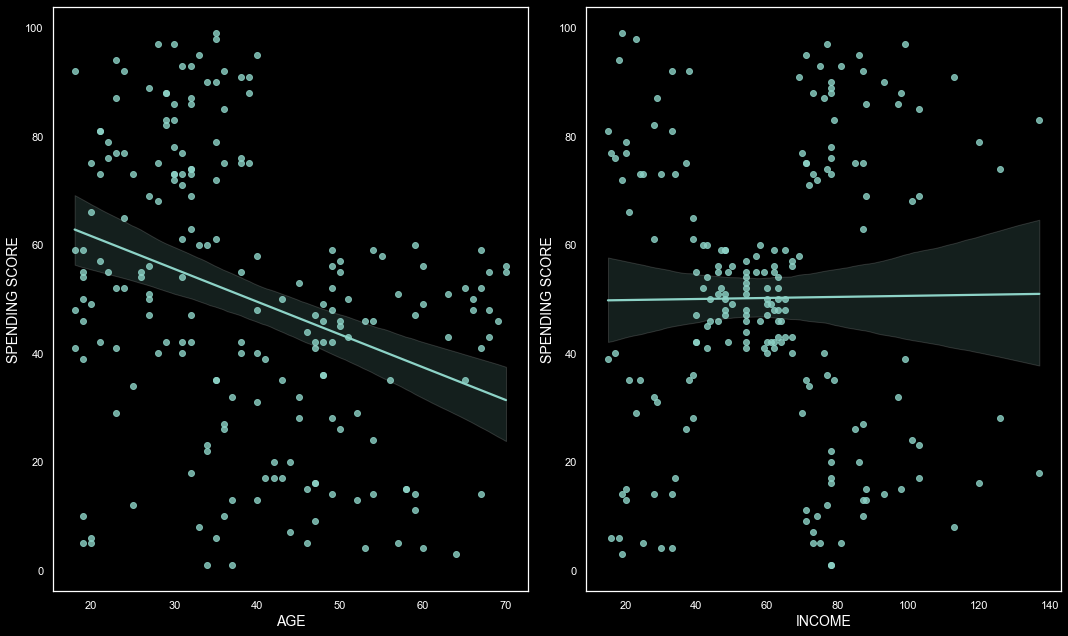

In [114]:
plt.style.use('dark_background')
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
sns.regplot(x=mall['Age'],y=mall['Spending Score (1-100)'])
plt.xlabel('AGE',fontdict={'color':'white','size':14})
plt.ylabel('SPENDING SCORE',fontdict={'color':'white','size':14})

plt.subplot(1,2,2)
sns.regplot(x=mall['Annual Income (k$)'],y=mall['Spending Score (1-100)'])
plt.xlabel('INCOME',fontdict={'color':'white','size':14})
plt.ylabel('SPENDING SCORE',fontdict={'color':'white','size':14})

plt.tight_layout()

The first scatterplot shows that younger people tend to spend more.

Annual Income and Spending Score has a very weak positive relationship between them.

In [115]:
#converting categorical variables into continuous
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(mall['Gender'])
mall['Gender']=label.transform(mall['Gender'])

In [116]:
display(mall.head())

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Scaling the Data

In [117]:
df=mall[['Age','Annual Income (k$)','Spending Score (1-100)']]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(df.values)
df=scaler.transform(df.values)

In [118]:
df=pd.DataFrame(df)
df['Gender']=mall['Gender']
display(df.head())

,0,1,2,Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


In [119]:
df=df.rename(columns={0:'Age',1:'Annual Income (k$)',2:'Spending Score (1-100)'})
display(df.head())

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


## Finding the Optimal Number of Clusters through Elbow Plot

In [120]:
distortions=[]  #It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.[Measure of Hetrogeneity]
inertias=[]     # It is the sum of squared distances of samples to their closest cluster center.[Measure of Homogenity]
mapping1={}
mapping2={}
K=range(1,10)

In [121]:
#Building and fitting the model
for i in K:
    kmeans=KMeans(n_clusters=i,random_state=0).fit(df)
    kmeans.fit(df)
    distortions.append(sum(np.min(cdist(df,kmeans.cluster_centers_,'euclidean'),axis=1))/df.shape[0])
    inertias.append(kmeans.inertia_)
    mapping1[i]=sum(np.min(cdist(df,kmeans.cluster_centers_,'euclidean'),axis=1))/df.shape[0]
    mapping2[i]=kmeans.inertia_

1 : 1.7064004654739882
2 : 1.3990233508785348
3 : 1.2260284029465038
4 : 1.0683406873587034
5 : 0.9810797616644672
6 : 0.9051498223531518
7 : 0.8518121796468496
8 : 0.8236567387455959
9 : 0.7947840608846652


Text(0, 0.5, 'Distortion')

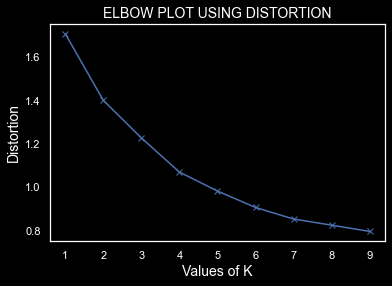

In [122]:
#Based on Distortion
for key,val in mapping1.items():
    print(str(key)+' : '+str(val))

plt.style.use('dark_background')
plt.plot(K,distortions,'bx-')
plt.title('ELBOW PLOT USING DISTORTION',fontdict={'color':'white','size':14})
plt.xlabel('Values of K',fontdict={'color':'white','size':14})
plt.ylabel('Distortion',fontdict={'color':'white','size':14})

1 : 649.2800000000002
2 : 438.5224115567773
3 : 345.2455265099015
4 : 254.28290726083466
5 : 216.78490151651047
6 : 181.9514362434146
7 : 164.77249848423298
8 : 151.53969637480242
9 : 139.28059820520602


Text(0, 0.5, 'Inertia')

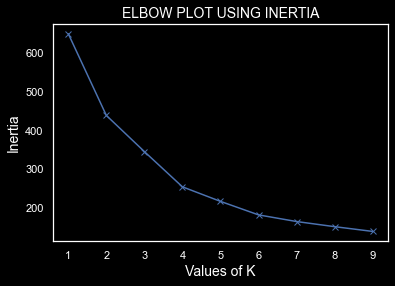

In [123]:
#Based on Inertia
for key,val in mapping2.items():
    print(str(key)+' : '+str(val))

plt.style.use('dark_background')
plt.plot(K,inertias,'bx-')
plt.title('ELBOW PLOT USING INERTIA',fontdict={'color':'white','size':14})
plt.xlabel('Values of K',fontdict={'color':'white','size':14})
plt.ylabel('Inertia',fontdict={'color':'white','size':14})

It is clear from the figure that we should take the number of clusters equal to 4, as the slope of the curve is not steep enough after it.

## K-Means Clustering

Text(0.5, 1.0, 'DATASET BEFORE CLUSTERING')

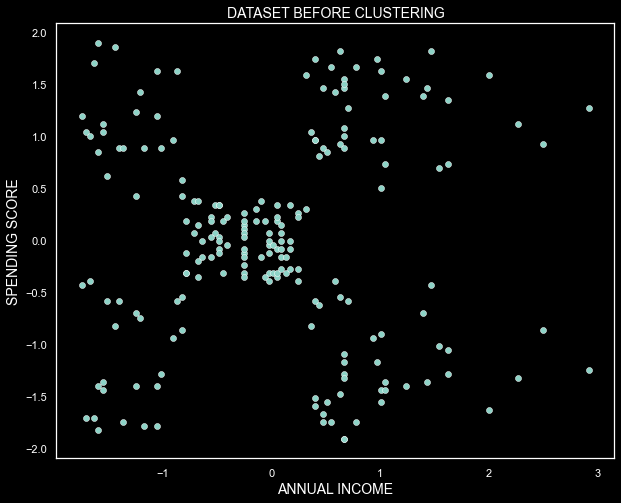

In [124]:
plt.style.use('dark_background')
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.xlabel('ANNUAL INCOME',fontdict={'color':'white','size':14})
plt.ylabel('SPENDING SCORE',fontdict={'color':'white','size':14})
plt.title('DATASET BEFORE CLUSTERING',fontdict={'color':'white','size':14})

In [125]:
kmeans1=KMeans(n_clusters=4,random_state=0)  #Create an instance of a K Means model with 4 clusters
kmeans1.fit(df)  #Fit the model to all the data

KMeans(n_clusters=4, random_state=0)

In [126]:
cluster=kmeans1.predict(df)  #predicting the cluster
cluster=pd.DataFrame(cluster)
display(cluster)

,0
0,3
1,3
2,3
3,3
4,3
...,...
195,0
196,1
197,0
198,1


In [127]:
cluster=cluster.rename(columns={0:'Cluster'})  #renaming the column

In [128]:
#Concating the clusters with the scaled data frame
df=pd.concat([df,cluster],axis=1)
display(df.head())

,Age,Annual Income (k$),Spending Score (1-100),Gender,Cluster
0,-1.424569,-1.738999,-0.434801,1,3
1,-1.281035,-1.738999,1.195704,1,3
2,-1.352802,-1.700830,-1.715913,0,3
3,-1.137502,-1.700830,1.040418,0,3
4,-0.563369,-1.662660,-0.395980,0,3


Text(0.5, 1.0, 'DATASET WITH 4 CLUSTERS')

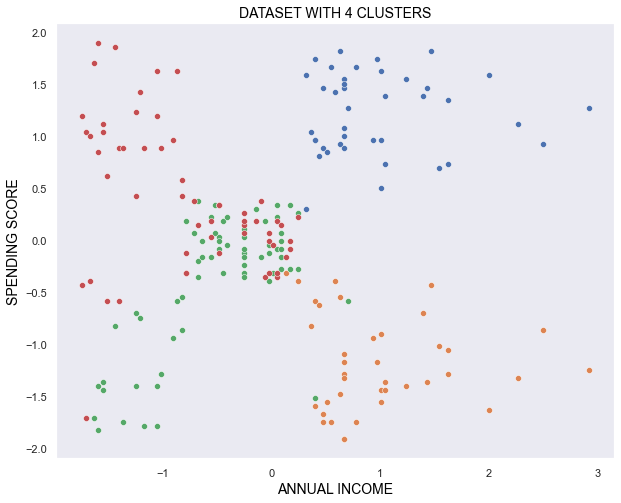

In [129]:
sns.set(style='dark')
plt.subplots(figsize=(10,8))
sns.scatterplot(x=df['Annual Income (k$)'][df['Cluster']==0],y=df['Spending Score (1-100)'][df['Cluster']==0],palette=sns.color_palette("hls",10))
sns.scatterplot(x=df['Annual Income (k$)'][df['Cluster']==1],y=df['Spending Score (1-100)'][df['Cluster']==1],palette=sns.color_palette("hls",10))
sns.scatterplot(x=df['Annual Income (k$)'][df['Cluster']==2],y=df['Spending Score (1-100)'][df['Cluster']==2],palette=sns.color_palette("hls",10))
sns.scatterplot(x=df['Annual Income (k$)'][df['Cluster']==3],y=df['Spending Score (1-100)'][df['Cluster']==3],palette=sns.color_palette("hls",10))
plt.xlabel('ANNUAL INCOME',fontdict={'color':'black','size':14})
plt.ylabel('SPENDING SCORE',fontdict={'color':'black','size':14})
plt.title('DATASET WITH 4 CLUSTERS',fontdict={'color':'black','size':14})

<AxesSubplot:xlabel='Cluster', ylabel='Spending Score (1-100)'>

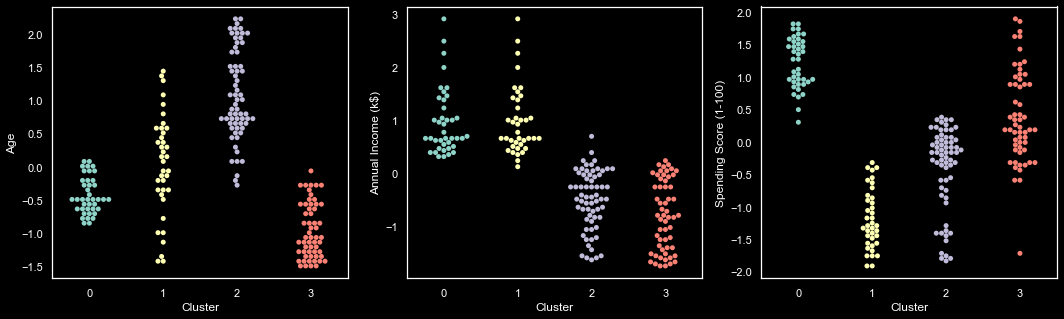

In [130]:
plt.style.use('dark_background')
fig,axes=plt.subplots(1,3,figsize=(18,5))
sns.swarmplot(x=df['Cluster'],y=df['Age'],ax=axes[0])
sns.swarmplot(x=df['Cluster'],y=df['Annual Income (k$)'],ax=axes[1])
sns.swarmplot(x=df['Cluster'],y=df['Spending Score (1-100)'],ax=axes[2])

## EVALUATION AND ANALYSIS

In [131]:
#Concating the clusters with the original data
mall=pd.concat([mall,cluster],axis=1)

In [132]:
#Analyzing the clusters with the means of varibles
grp=mall.groupby(['Cluster'],as_index=False).mean()

In [133]:
display(grp)

,Cluster,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0.450000,32.875000,86.100000,81.525000
1,1,0.500000,39.368421,86.500000,19.578947
2,2,0.430769,53.984615,47.707692,39.969231
3,3,0.403509,25.438596,40.000000,60.298246


Since the overall means of all variables from clusters differ from each other we can say that the model performed well with 4 clusters.

<AxesSubplot:xlabel='Cluster', ylabel='Spending Score (1-100)'>

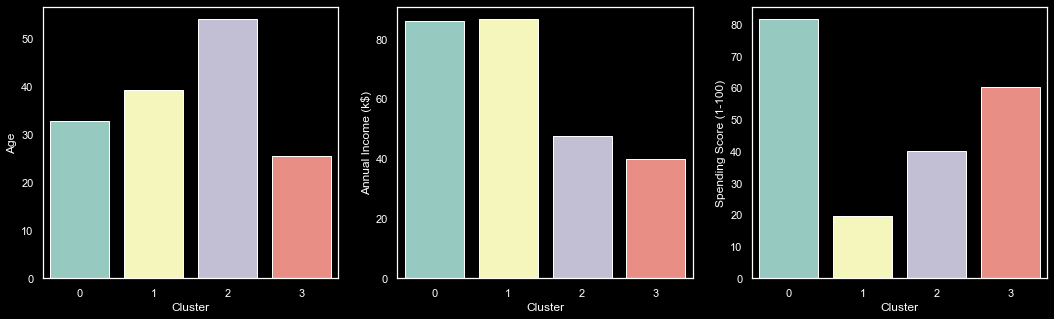

In [134]:
fig,axes=plt.subplots(1,3,figsize=(18,5))
sns.barplot(x=grp['Cluster'],y=grp['Age'],ax=axes[0])
sns.barplot(x=grp['Cluster'],y=grp['Annual Income (k$)'],ax=axes[1])
sns.barplot(x=grp['Cluster'],y=grp['Spending Score (1-100)'],ax=axes[2])

Cluster 0: This cluster comprises of age of around 30 with high average annual income and high spending.

Cluster 1: This cluster comprises of age of around 40 with  high average income and low spending capacity.

Cluster 2: This cluster comprises of age of around 50 with low to mid average income and spending score. 

Cluster 3: This cluster comprises of age of around 25 with low  average income and  mid to  high spending score.

Finally, based on our machine learning technique we may deduce that to increase the profits of the mall, the mall authorities should target people belonging to cluster 1 and should also maintain its standards to keep the people belonging to cluster 0 and cluster 3 happy and satisfied.